<a href="https://colab.research.google.com/github/yaqianhe/GIA/blob/main/Lecture10_SpatialVector_I%26II%26III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Lecture 10: Spatial Vector data: GeoPandas I&II&III
##Yaqian He
##Department of Geography
##University of Central Arkansas


## Spatial Vector Data in Python
Geospatial data in vector format are often stored in a shapefile format. Shapefile contains many different files, including .shp, .shx, .dbf, .prj. When you work with a shapefile, you must keep all of the files together. 

This section will introduce how to use, manipulate, plot, and analyze spatial vector data using geopandas. Specifically, you will learn how to view information of vector data, reproject, clip, dissolve, and spatial join vector data.

In [ ]:
# Import packages
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from shapely.geometry import Point #manipulation and analysis of planar geometric objects
from shapely.geometry import box
import seaborn as sns
!apt install libspatialindex-dev #spatial indexing methods
!pip install rtree
!pip install geopandas #rtree and libspatialindex-dev must be installed before geopandas, otherwise errors will be shown up
import geopandas as gpd
!pip install earthpy
import earthpy as et
#!pip install mapclassify
import pandas as pd
!pip install mapclassify
import mapclassify

# Adjust font size and style of all plots in notebook with seaborn
sns.set(font_scale=1.5, style="whitegrid")

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 kB]
Fetched 555 kB in 1s (841 kB/s)
Selecting previously unselected package libspatialindex4v5:amd64.
(Reading database ... 155332 files and directories currently installed.)
Preparing to unpack .../libspatialindex4v5_1.8.5-5_

In [ ]:
# Download the data

data = et.data.get_data('spatial-vector-lidar')
# Get data and set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics',"data"))

Extracted output to /root/earth-analytics/data/spatial-vector-lidar/.


The data you will import includes:

(1) A polygon shapefile representing a field site boundary

(2) A line shapefile representing roads, and 

(3) A point shapefile representing the location of field sites at the San Joachin field site.

The field site is from National Science Foundation's National Ecological Observatory Network (NEON) https://www.neonscience.org/about

In [ ]:
# Define path to file
plot_centroid_path = os.path.join("spatial-vector-lidar", 
                                  "california", "neon-sjer-site", 
                                  "vector_data", "SJER_plot_centroids.shp")

# Import shapefile using geopandas
sjer_plot_locations = gpd.read_file(plot_centroid_path)

## 1. View Spatial Metadata

In [ ]:
# View attribute table - first few rows
sjer_plot_locations

,Plot_ID,Point,northing,easting,plot_type,geometry
0,SJER1068,center,4111567.818,255852.376,trees,POINT (255852.376 4111567.818)
1,SJER112,center,4111298.971,257406.967,trees,POINT (257406.967 4111298.971)
2,SJER116,center,4110819.876,256838.760,grass,POINT (256838.760 4110819.876)
3,SJER117,center,4108752.026,256176.947,trees,POINT (256176.947 4108752.026)
4,SJER120,center,4110476.079,255968.372,grass,POINT (255968.372 4110476.079)
5,SJER128,center,4111388.570,257078.867,trees,POINT (257078.867 4111388.570)
6,SJER192,center,4111071.087,256683.434,grass,POINT (256683.434 4111071.087)
7,SJER272,center,4112167.778,256717.467,trees,POINT (256717.467 4112167.778)
8,SJER2796,center,4111533.879,256034.390,soil,POINT (256034.390 4111533.879)
9,SJER3239,center,4109856.983,258497.102,soil,POINT (258497.102 4109856.983)


In [ ]:
# View the geometry type of each row, point, line, or polygon?
sjer_plot_locations.geom_type

0     Point
1     Point
2     Point
3     Point
4     Point
5     Point
6     Point
7     Point
8     Point
9     Point
10    Point
11    Point
12    Point
13    Point
14    Point
15    Point
16    Point
17    Point
dtype: object

In [ ]:
# View coordinate reference system (CRS)
sjer_plot_locations.crs

<Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 120°W and 114°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Alberta; British Columbia (BC); Northwest Territories (NWT); Nunavut. Mexico. United States (USA).
- bounds: (-120.0, 0.0, -114.0, 84.0)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

There are numerous formats that are used to document a CRS. Three common formats include:

- proj.4
- EPSG
- Well-know Text (WKT) formats

You can also find the projection name through https://spatialreference.org/.

In [ ]:
# View the spatial extent
sjer_plot_locations.total_bounds #minx, miny, maxx, maxy

array([ 254738.618, 4107527.074,  258497.102, 4112167.778])

Note, the spatial extent of a shapefile or geopandas GeoDataFrame represents the geographic "edge" or location that is the furthest north, south, east, and west. Thus it represents the overall geographic coverage of the spatial object.

In [ ]:
# You can view the number of record (counted by number of rows in the attribute table)
# feature attributes (number of columns) in the data using the pandas .shape method.
sjer_plot_locations.shape

(18, 6)

The 18 represents number of recrods and 6 represents feature attributes.

## 2. Plot a Shapefile
Now, you can visualize the data in Python geodataframe object using the syntax:
yourdata.plot().

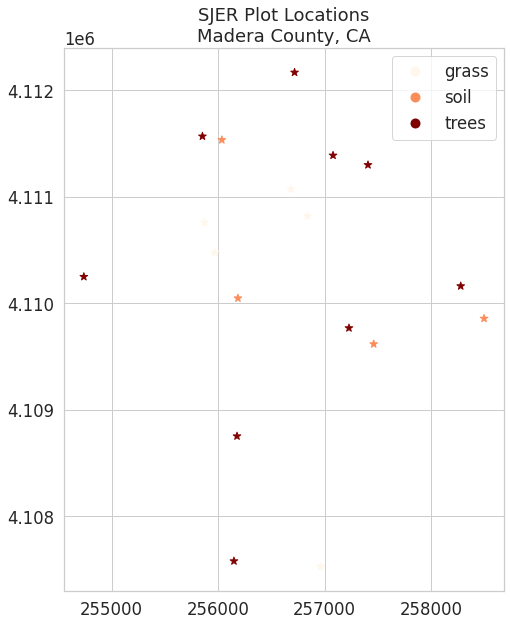

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

sjer_plot_locations.plot(column='plot_type', #the attributes column that you want to plot your data
                         categorical=True, #set the plot to plot categorical data - in this case plot types
                         legend=True, # add a legend
                         marker='*', #specify the marker style
                         markersize=65, #increase or decrease the size of the points or markers rendered on the plot
                         cmap='OrRd', #set the colors used to plot the data
                         ax=ax)

ax.set_title('SJER Plot Locations\nMadera County, CA')

plt.show()

## 3. Geographic vs projected CRS

It is important to understand the coordinate system that your data uses, particularly if you are working with different data sotred in different coordinate systems. You always want all of your data in the same projection for performing analysis and prcoessing tasks.

This section will show you how the CRS impacts the data visulization.

In [ ]:
# Import world boundary shapefile
worldBound_path = os.path.join("spatial-vector-lidar", "global", 
                               "ne_110m_land", "ne_110m_land.shp")
worldBound = gpd.read_file(worldBound_path)
worldBound.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<h3>3.1 Plot shapefile with Geographic CRS</h3>

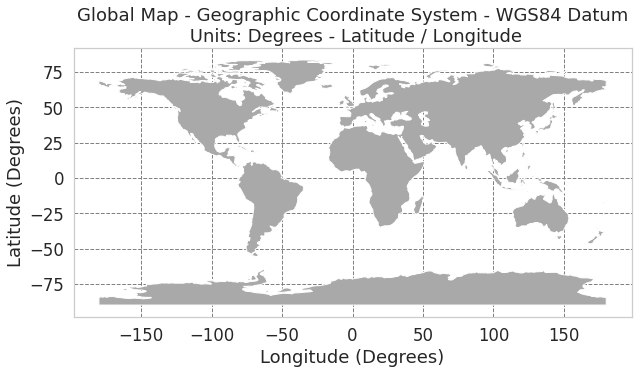

In [ ]:
# Plot worldBound data using geopandas
fig, ax = plt.subplots(figsize=(10, 5))
worldBound.plot(color='darkgrey', 
                ax=ax)
# Set the x and y axis labels
ax.set(xlabel="Longitude (Degrees)",
       ylabel="Latitude (Degrees)",
       title="Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Latitude / Longitude")

# Add the x y graticules
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', 
              linestyle='dashed')
ax.xaxis.grid(color='gray', 
              linestyle='dashed')

Add spatial points to the map. Note that the unit is in decimal degree (latitude, longitude):
- Conway, Arkansas: 35.0887, -92.4421
- Jiangshan, China: 28.7373, 118.6270
- Mallorca, Spain: 39.6167, 2.9833

In [ ]:
# Create numpy array of x,y point locations
add_points = np.array([[ -92.4421,   35.0887 ], 
                       [  118.6270  ,   28.7373], 
                       [   2.9833,   39.6167]])

# Turn points into list of x,y shapely points 
city_locations = [Point(xy) for xy in add_points] # this is a loop
city_locations

In [ ]:
# Create geodataframe using the points
city_locations = gpd.GeoDataFrame(city_locations, 
                                  columns=['geometry'],
                                  crs=worldBound.crs)
city_locations.head()

,geometry
0,POINT (-92.44210 35.08870)
1,POINT (118.62700 28.73730)
2,POINT (2.98330 39.61670)


Plot the city points on top of the world map. Does it looks right?

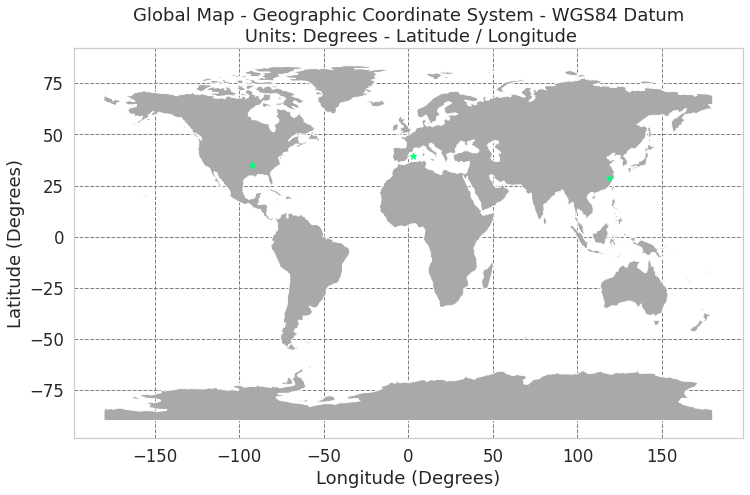

In [ ]:
# Plot point locations
fig, ax = plt.subplots(figsize=(12, 8))

worldBound.plot(figsize=(10, 5), color='darkgrey',
               ax=ax)
# Add city locations
city_locations.plot(ax=ax, 
                    color='springgreen', 
                    marker='*',
                    markersize=45)

# Setup x y axes with labels and add graticules
ax.set(xlabel="Longitude (Degrees)", ylabel="Latitude (Degrees)",
       title="Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Latitude / Longitude")
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')

Plot proper graticules that can be projected into a particular coordinate reference system.

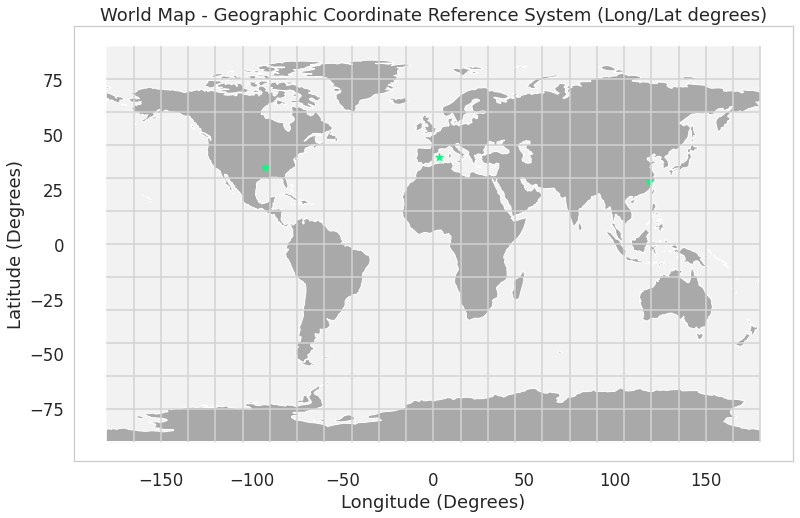

In [ ]:
# Import graticule & world bounding box shapefile data
graticule_path = os.path.join("spatial-vector-lidar", "global", 
                              "ne_110m_graticules_all", "ne_110m_graticules_15.shp")
graticule = gpd.read_file(graticule_path)

bbox_path = os.path.join("spatial-vector-lidar", "global", 
                         "ne_110m_graticules_all", "ne_110m_wgs84_bounding_box.shp")
bbox = gpd.read_file(bbox_path)

# Create map axis object
fig, ax = plt.subplots(figsize=(15, 8))

# Add bounding box and graticule layers
bbox.plot(ax=ax, alpha=.1, color='grey')
graticule.plot(ax=ax, color='lightgrey')
worldBound.plot(ax=ax, color='darkgrey')

# Add points to plot 
city_locations.plot(ax=ax, 
                    markersize=60, 
                    color='springgreen',
                    marker='*')
# Add title and axes labels
ax.set(title="World Map - Geographic Coordinate Reference System (Long/Lat degrees)",
       xlabel="Longitude (Degrees)", ylabel="Latitude (Degrees)");
ax.grid(False)

<h3>3.2 Plot shapefile with Projected CRS</h3>
You can view the same data above, in another CRS- Robinson. Robinson is a projected CRS. Notice that the country boundaries on the map have a different shape compared to the map that you created above in the geographic CRS.

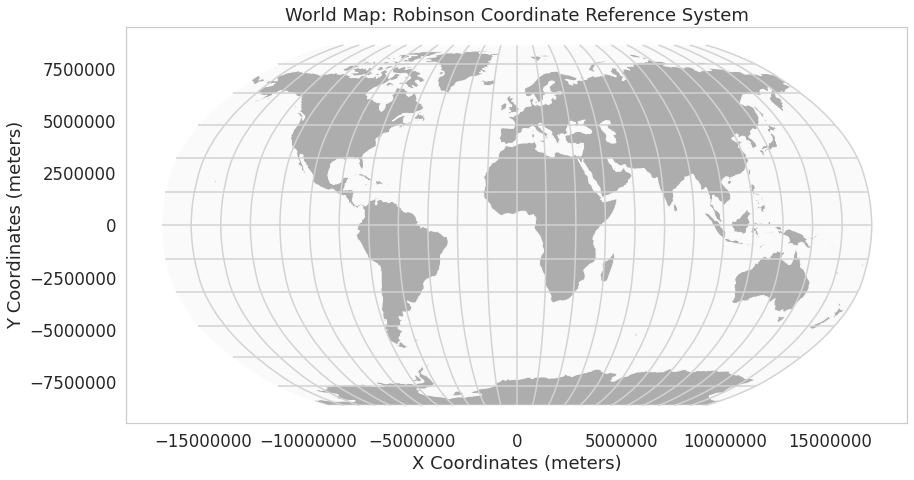

In [ ]:
# Reproject the data
worldBound_robin = worldBound.to_crs('+proj=robin')
bbox_robin = bbox.to_crs('+proj=robin')
graticule_robin = graticule.to_crs('+proj=robin')

# Plot the data
fig, ax = plt.subplots(figsize=(14, 10))

worldBound_robin.plot(ax=ax,
                      color='darkgrey')
bbox_robin.plot(ax=ax,alpha=.1, color="lightgrey")
graticule_robin.plot(ax=ax, color='lightgrey')

ax.set(title="World Map: Robinson Coordinate Reference System",
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)")
ax.grid(False)
for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)

What happens if you add the same Lat/ Long coordinate locations that you used above to your map?

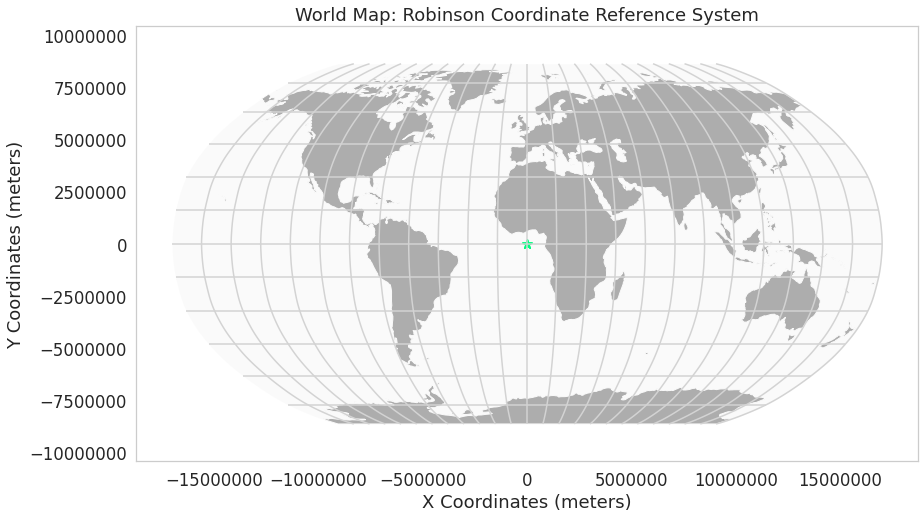

In [ ]:
# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

worldBound_robin.plot(ax=ax,
                      color='darkgrey')
bbox_robin.plot(ax=ax,alpha=.1, color="lightgrey")
graticule_robin.plot(ax=ax, 
                     color='lightgrey')
city_locations.plot(ax=ax, 
                    marker='*', 
                    color='springgreen', 
                    markersize=100)

ax.set(title="World Map: Robinson Coordinate Reference System", 
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)")
ax.grid(False)
for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)
    
plt.axis('equal');    

## 4 Processing Spatial Vector Data in Python
<h3>4.1 Reprojection</h3>

Notice above that when you try to add Lat/Long coordinates in degrees, to a map in different CRS, the points are not in the correct location. You need to first convert the points to the same CRS that other data are in. 

The process of converting a dataset from one CRS to another is often referred to as **reprojection**.

In python, you can use the .to_crs method to reproject data.

Note, when you reproject data, you are modifying it. Thus you are introducing some uncertainty into the data. While this is a slightly less important issue when working with vector data (compared to raster), it is important to consider.

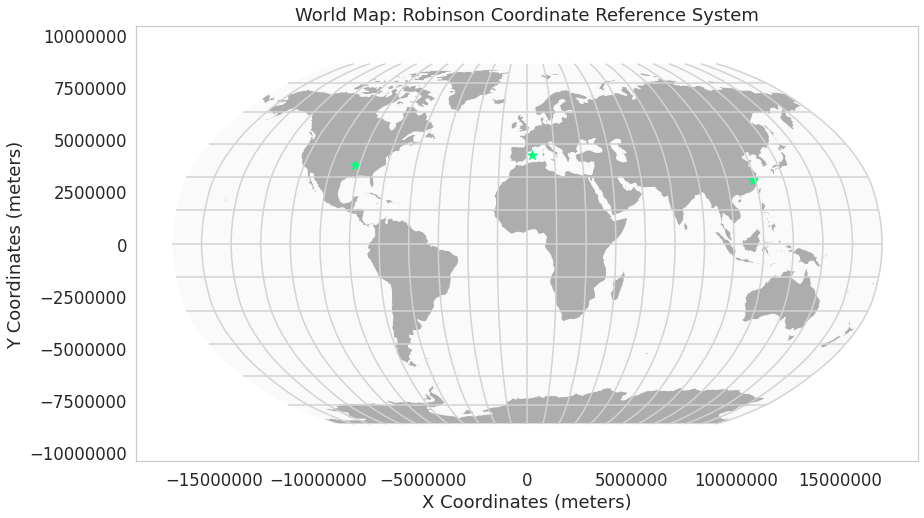

In [ ]:
# Reproject point locations to the Robinson projection
city_locations_robin = city_locations.to_crs(worldBound_robin.crs)
# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

worldBound_robin.plot(ax=ax,
                      color='darkgrey')
bbox_robin.plot(ax=ax,alpha=.1, color="lightgrey")
graticule_robin.plot(ax=ax, 
                     color='lightgrey')
city_locations_robin.plot(ax=ax, 
                    marker='*', 
                    color='springgreen', 
                    markersize=100)

ax.set(title="World Map: Robinson Coordinate Reference System", 
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)")
ax.grid(False)
for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)
    
plt.axis('equal'); # same scaling from data points to plot units for X-axis and Y-axis    

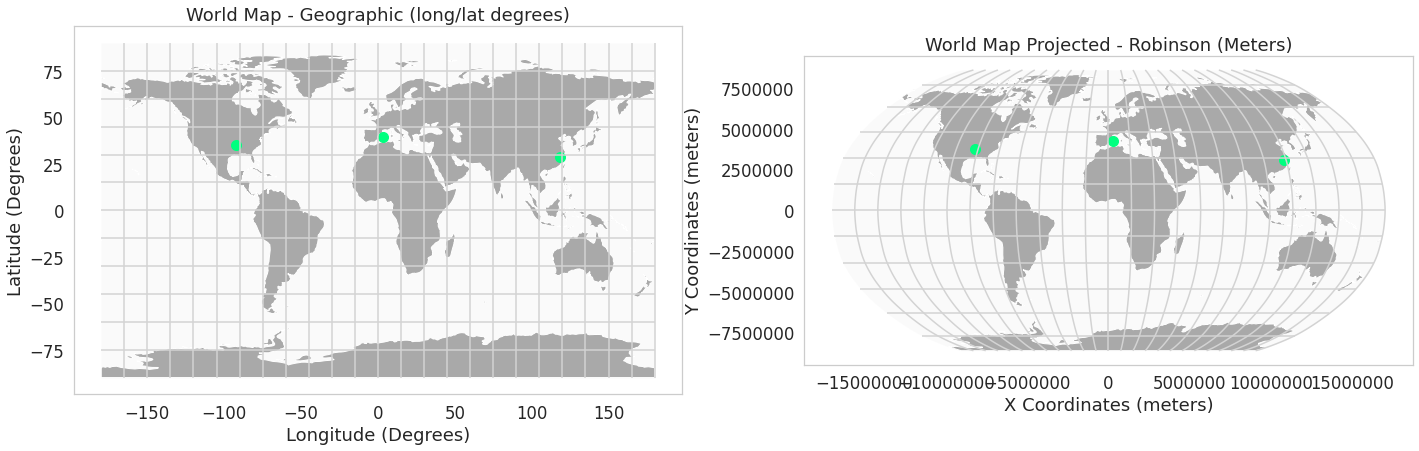

In [ ]:
# side by side comparison for different projections

# Setup plot with 2 "rows" one for each map and one column
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(24, 15))

# First plot
bbox.plot(ax=ax0,
          alpha=.1,
          color='lightgrey')

graticule.plot(ax=ax0,
               color='lightgrey')

worldBound.plot(ax=ax0,
                color='darkgrey')

city_locations.plot(ax=ax0,
                    markersize=100,
                    color='springgreen')

ax0.set(title="World Map - Geographic (long/lat degrees)",
        xlabel="Longitude (Degrees)", ylabel="Latitude (Degrees)")
ax0.grid(False)

# Second plot
bbox_robin.plot(ax=ax1,
                   alpha=.1,
                   color='lightgrey')

graticule_robin.plot(ax=ax1,
                        color='lightgrey')

worldBound_robin.plot(ax=ax1,
                      color='darkgrey')

city_locations_robin.plot(ax=ax1,
                          markersize=100,
                          color='springgreen')

ax1.set(title="World Map Projected - Robinson (Meters)",
        xlabel="X Coordinates (meters)",
        ylabel="Y Coordinates (meters)")
ax1.grid(False)

for axis in [ax1.xaxis, ax1.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)

Now plot various spatial datasets in different CRS.

In [ ]:
# Import the data
# road data
sjer_roads_path = os.path.join("spatial-vector-lidar", "california", 
                               "madera-county-roads", "tl_2013_06039_roads.shp")
sjer_roads = gpd.read_file(sjer_roads_path)

# aoi stands for area of interest
sjer_aoi_path = os.path.join("spatial-vector-lidar", "california", 
                             "neon-sjer-site", "vector_data", "SJER_crop.shp")
sjer_aoi = gpd.read_file(sjer_aoi_path)

# View the Coordinate Reference System of both layers 
print(sjer_roads.crs)
print(sjer_aoi.crs)

epsg:4269
epsg:32611


epsg:4269 is corresponding to +proj=longlat +ellps=GRS80 +datum=NAD83 +no_defs 

epsg:32611 is corresponding to +proj=utm +zone=11 +ellps=WGS84 +datum=WGS84 +units=m +no_defs

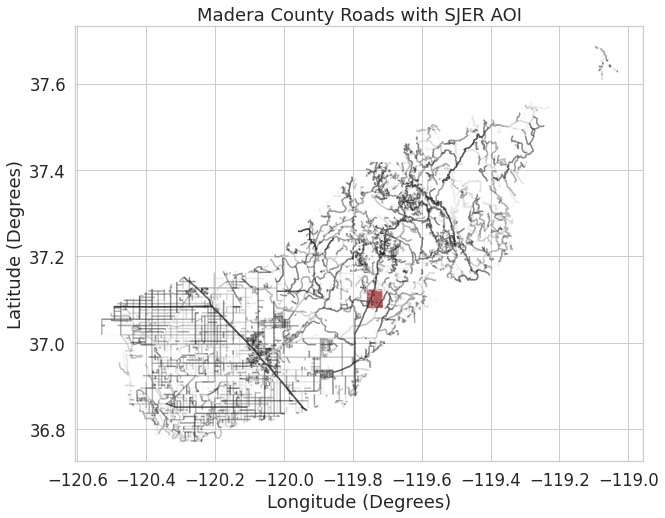

In [ ]:
# Reproject the aoi to match the roads layer
sjer_aoi_nad83  = sjer_aoi.to_crs(epsg=4269)

# Plot roads for Madera County, California with the study area extent overlayed on top.
fig, ax = plt.subplots(figsize=(12, 8))

sjer_roads.plot(cmap='Greys', ax=ax, alpha=.5)
sjer_aoi_nad83.plot(ax=ax, markersize=10, color='r')

ax.set(title="Madera County Roads with SJER AOI",
             xlabel="Longitude (Degrees)", ylabel="Latitude (Degrees)");
#ax.grid(False)

Great! You've now reprojected a dataset to be able to map the sjer AOI on top of the roads layer. Try this process again but this time using some census data boundaries.

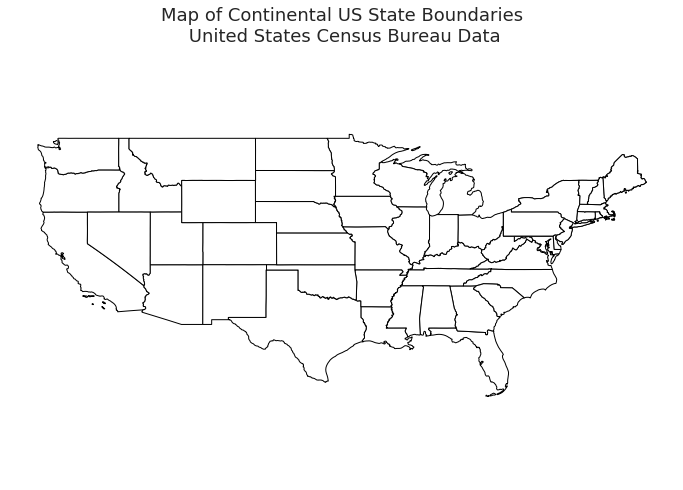

In [ ]:
# The data will be used is from United States Census Bureau
# Import data into geopandas dataframe
state_boundary_us_path = os.path.join("spatial-vector-lidar", 
                                      "usa", "usa-states-census-2014.shp")
state_boundary_us = gpd.read_file(state_boundary_us_path)

# Plot the data
fig, ax = plt.subplots(figsize = (12,8))
state_boundary_us.plot(ax = ax, facecolor = 'white', edgecolor = 'black')

# Add title to map
ax.set(title="Map of Continental US State Boundaries\n United States Census Bureau Data")

# Turn off the axis  
plt.axis('equal')
ax.set_axis_off()

plt.show()

Now add the SJER study area site locations to the map. Notice, the CRS of the maps need to be same.

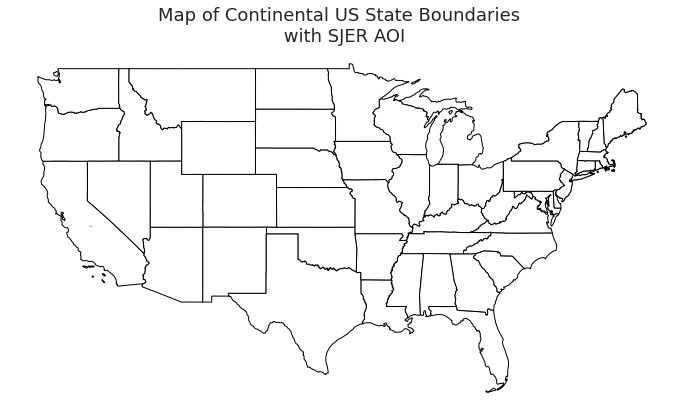

In [ ]:
fig, ax = plt.subplots(figsize = (12,8))

state_boundary_us.plot(ax = ax,
                       facecolor = 'white', edgecolor = 'black')
sjer_aoi_nad83.plot(ax=ax, 
                    color='springgreen',
                    edgecolor = "r")

ax.set(title="Map of Continental US State Boundaries \n with SJER AOI")

ax.set_axis_off()
plt.show()

It is hard to see the tiny extent box on a map of the entire US. Try to zoom in on just a small portion of the map to better see the extent by using the syntax:

ax.set(xlim=[minx, maxx], ylim=[miny, maxy])

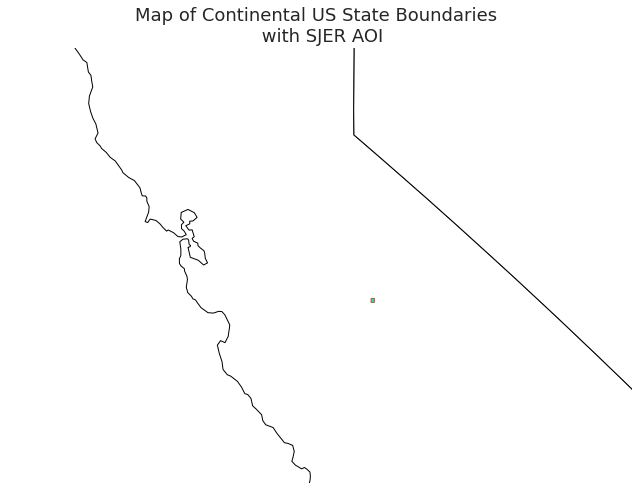

In [ ]:
fig, ax = plt.subplots(figsize = (12,8))

state_boundary_us.plot(ax = ax,
                       facecolor = 'white', edgecolor = 'black')
sjer_aoi_nad83.plot(ax=ax, 
                    color='springgreen',
                    edgecolor = "r")

ax.set(title="Map of Continental US State Boundaries \n with SJER AOI")
ax.set(xlim=[-125, -116], ylim=[35, 40])

ax.set_axis_off()
plt.show()

<h3>4.2 Clip Vector Data</h3>
When you have more data than you need, you may want to clip your data and get the data only for your study area. In doing so, you can save much time to process and analyze it. In this section, you will learn how to clip point and line data using geopandas.

<h3> 4.2.1 Clip the Points Shapefile</h3>

(1) A country boundary for the USA

(2) A state boundary layer for the USA

(3) Populated places in the USA

Notice that there are points outside of your study area which is the continental USA. Your goal is to clip the points out that you need for your project.

In [ ]:
# Import all of your data at the top of your notebook to keep things organized.
country_boundary_us_path = os.path.join("spatial-vector-lidar", 
                                        "usa", "usa-boundary-dissolved.shp")
country_boundary_us = gpd.read_file(country_boundary_us_path)

state_boundary_us_path = os.path.join("spatial-vector-lidar", 
                                      "usa", "usa-states-census-2014.shp")
state_boundary_us = gpd.read_file(state_boundary_us_path)

pop_places_path = os.path.join("spatial-vector-lidar", "global", 
                               "ne_110m_populated_places_simple", "ne_110m_populated_places_simple.shp")
pop_places = gpd.read_file(pop_places_path)

# Are the data all in the same crs?
print("country_boundary_us", country_boundary_us.crs)
print("state_boundary_us", state_boundary_us.crs)
print("pop_places", pop_places.crs)

country_boundary_us epsg:4326
state_boundary_us epsg:4326
pop_places epsg:4326


In [ ]:
# geometry type
print("country_boundary_us", country_boundary_us.geom_type)
print("state_boundary_us", state_boundary_us.geom_type)
print("pop_places", pop_places.geom_type)

country_boundary_us 0    MultiPolygon
dtype: object
state_boundary_us 0     MultiPolygon
1          Polygon
2     MultiPolygon
3          Polygon
4          Polygon
5          Polygon
6          Polygon
7          Polygon
8          Polygon
9     MultiPolygon
10    MultiPolygon
11         Polygon
12         Polygon
13    MultiPolygon
14         Polygon
15         Polygon
16         Polygon
17    MultiPolygon
18    MultiPolygon
19         Polygon
20         Polygon
21         Polygon
22         Polygon
23         Polygon
24         Polygon
25         Polygon
26         Polygon
27    MultiPolygon
28    MultiPolygon
29    MultiPolygon
30         Polygon
31         Polygon
32         Polygon
33         Polygon
34         Polygon
35         Polygon
36    MultiPolygon
37         Polygon
38         Polygon
39         Polygon
40    MultiPolygon
41         Polygon
42         Polygon
43         Polygon
44         Polygon
45         Polygon
46         Polygon
47         Polygon
48         Polygon

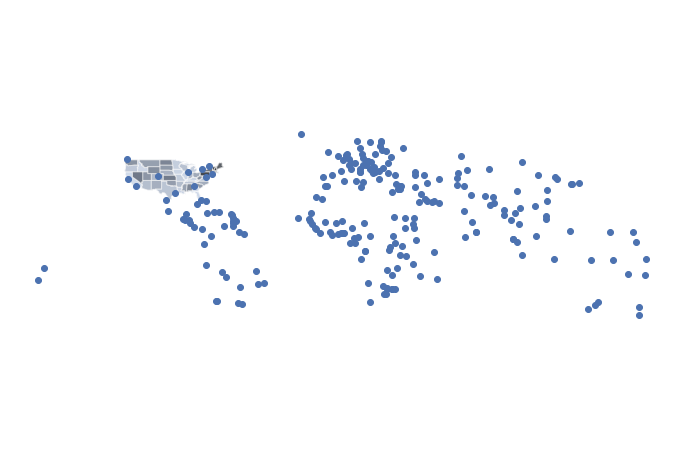

In [ ]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

country_boundary_us.plot(alpha=.5, #regulate the transparency of a graph
                         ax=ax)

state_boundary_us.plot(cmap='Greys',
                       ax=ax,
                       alpha=.5)
pop_places.plot(ax=ax)

plt.axis('equal')
ax.set_axis_off()
plt.show()

Notice that the populated places are over the globe. You want to clip it and get the places only over the United States.

To clip points, lines, and polygons, GeoPandas has a function named clip() that will clip all types of geometries.

In [ ]:
pop_places.head()

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,diffascii,nameascii,adm0cap,...,pop_other,rank_max,rank_min,geonameid,meganame,ls_name,ls_match,checkme,min_zoom,geometry
0,8,10,3,Admin-0 capital,Vatican City,None,None,0,Vatican City,1.0,...,562430,2,2,6691831.0,None,Vatican City,1,0,7.0,POINT (12.45339 41.90328)
1,7,20,0,Admin-0 capital,San Marino,None,None,0,San Marino,1.0,...,0,7,7,3168070.0,None,San Marino,1,5,6.1,POINT (12.44177 43.93610)
2,7,20,0,Admin-0 capital,Vaduz,None,None,0,Vaduz,1.0,...,33009,7,5,3042030.0,None,Vaduz,1,0,6.7,POINT (9.51667 47.13372)
3,6,30,8,Admin-0 capital alt,Lobamba,None,None,0,Lobamba,0.0,...,0,5,4,935048.0,None,Lobamba,1,5,6.0,POINT (31.20000 -26.46667)
4,6,30,8,Admin-0 capital,Luxembourg,None,None,0,Luxembourg,1.0,...,106219,9,8,2960316.0,None,Luxembourg,1,0,6.0,POINT (6.13000 49.61166)


In [ ]:
pop_places.shape

(243, 38)

In [ ]:
# Clip the data using GeoPandas clip
points_clip = gpd.clip(pop_places, country_boundary_us)

# view shape of the clipped one
points_clip.shape

(9, 38)

In [ ]:
points_clip

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,diffascii,nameascii,adm0cap,...,pop_other,rank_max,rank_min,geonameid,meganame,ls_name,ls_match,checkme,min_zoom,geometry
178,1,300,1,Populated place,Miami,None,None,0,Miami,0.0,...,1037811,13,10,4164138.0,Miami,Miami,1,0,2.1,POINT (-80.22605 25.78956)
177,1,300,1,Populated place,Houston,None,None,0,Houston,0.0,...,3607616,12,12,4699066.0,Houston,Houston,1,0,3.0,POINT (-95.34193 29.82192)
179,1,300,1,Admin-1 capital,Atlanta,None,None,0,Atlanta,0.0,...,2874096,12,10,4180439.0,Atlanta,Atlanta,1,0,3.0,POINT (-84.40190 33.83196)
216,0,600,1,Populated place,Los Angeles,None,Los Angeles-Long Beach-Santa Ana,0,Los Angeles,0.0,...,142265,14,12,5368361.0,Los Angeles-Long Beach-Santa Ana,Los Angeles1,1,0,2.0,POINT (-118.18193 33.99192)
175,1,300,1,Populated place,San Francisco,None,San Francisco-Oakland,0,San Francisco,0.0,...,27400,12,11,5391959.0,San Francisco-Oakland,San Francisco1,1,0,2.7,POINT (-122.41717 37.76920)
217,0,600,1,Admin-0 capital,"Washington, D.C.",None,Washington D.C.,0,"Washington, D.C.",1.0,...,2175991,12,11,4140963.0,"Washington, D.C.","Washington, D.C.",1,5,2.1,POINT (-77.01136 38.90150)
176,1,300,1,Admin-1 capital,Denver,None,Denver-Aurora,0,Denver,0.0,...,1521278,12,12,5419384.0,Denver-Aurora,Denver,1,0,3.7,POINT (-104.98596 39.74113)
218,0,600,1,Populated place,New York,None,New York-Newark,0,New York,0.0,...,9292603,14,13,5128581.0,New York-Newark,New York,1,0,1.7,POINT (-73.98196 40.75192)
180,1,300,1,Populated place,Chicago,None,None,0,Chicago,0.0,...,3635101,13,12,4887398.0,Chicago,Chicago,1,0,3.0,POINT (-87.75200 41.83194)


In [ ]:
# View the first 6 rows and a few select columns
points_clip[['name', 'geometry', 'scalerank', 'natscale']].head()

,name,geometry,scalerank,natscale
178,Miami,POINT (-80.22605 25.78956),1,300
177,Houston,POINT (-95.34193 29.82192),1,300
179,Atlanta,POINT (-84.40190 33.83196),1,300
216,Los Angeles,POINT (-118.18193 33.99192),0,600
175,San Francisco,POINT (-122.41717 37.76920),1,300


In [ ]:
# reorder the index
points_clip.sort_index(ascending=True).head()

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,diffascii,nameascii,adm0cap,...,pop_other,rank_max,rank_min,geonameid,meganame,ls_name,ls_match,checkme,min_zoom,geometry
175,1,300,1,Populated place,San Francisco,None,San Francisco-Oakland,0,San Francisco,0.0,...,27400,12,11,5391959.0,San Francisco-Oakland,San Francisco1,1,0,2.7,POINT (-122.41717 37.76920)
176,1,300,1,Admin-1 capital,Denver,None,Denver-Aurora,0,Denver,0.0,...,1521278,12,12,5419384.0,Denver-Aurora,Denver,1,0,3.7,POINT (-104.98596 39.74113)
177,1,300,1,Populated place,Houston,None,None,0,Houston,0.0,...,3607616,12,12,4699066.0,Houston,Houston,1,0,3.0,POINT (-95.34193 29.82192)
178,1,300,1,Populated place,Miami,None,None,0,Miami,0.0,...,1037811,13,10,4164138.0,Miami,Miami,1,0,2.1,POINT (-80.22605 25.78956)
179,1,300,1,Admin-1 capital,Atlanta,None,None,0,Atlanta,0.0,...,2874096,12,10,4180439.0,Atlanta,Atlanta,1,0,3.0,POINT (-84.40190 33.83196)


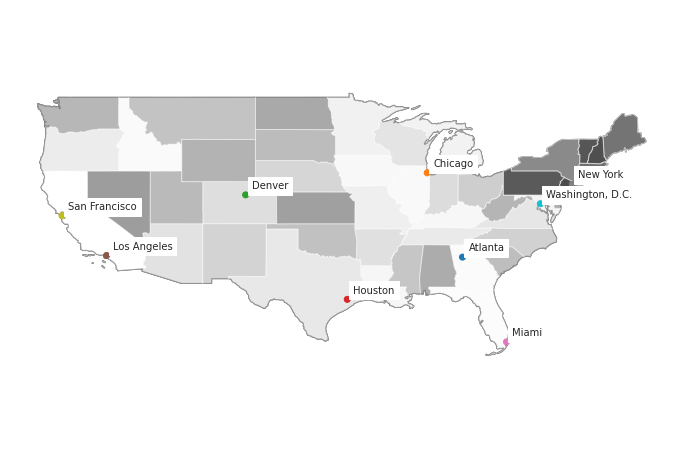

In [ ]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

country_boundary_us.plot(alpha=1,
                         color="white",
                         edgecolor="black",
                         ax=ax)

state_boundary_us.plot(cmap='Greys',
                       ax=ax,
                       alpha=.5)

points_clip.plot(ax=ax,
                 column='name')
ax.set_axis_off()
plt.axis('equal')

# Label each point
points_clip.apply(lambda x: ax.annotate(s=x['name'],
                                        xy=x.geometry.coords[0],
                                        xytext=(6, 6), textcoords="offset points",
                                        backgroundcolor="white"),
                  axis=1)
plt.show()

<h3>4.2.2 Clip Lines in Python</h3>

In this section, you will use the country_boundary layer and a clipped version of the natural earth 10m roads layer.

In [ ]:
# Open the roads layer
ne_roads_path = os.path.join("spatial-vector-lidar", "global", 
                             "ne_10m_roads", "ne_10m_roads.shp")
ne_roads = gpd.read_file(ne_roads_path)

# Are both layers in the same CRS?
if (ne_roads.crs == country_boundary_us.crs):
    print("Both layers are in the same crs!",
          ne_roads.crs, country_boundary_us.crs)

Both layers are in the same crs! epsg:4326 epsg:4326


In [ ]:
ne_roads.head()

,scalerank,featurecla,type,sov_a3,note,edited,name,namealt,namealtt,routeraw,...,rwdb_rd_id,orig_fid,prefix,uident,continent,expressway,level,min_zoom,min_label,geometry
0,8,Road,Secondary Highway,CAN,None,"Version 1.5: Changed alignment, a few adds in ...",None,None,None,None,...,0,0,None,314705,North America,0,None,7.1,9.6,"LINESTRING (-133.32533 62.21571, -133.31664 62..."
1,7,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",83,None,None,None,...,0,0,None,108105,North America,0,Federal,7.0,8.6,"LINESTRING (-100.50543 42.80753, -100.53495 42..."
2,7,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",840,None,None,None,...,0,0,None,0,North America,0,U/C,7.0,9.5,"LINESTRING (-87.27432 36.02439, -87.22916 35.9..."
3,8,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",151,None,None,None,...,0,0,None,0,North America,0,Federal,7.1,9.6,"LINESTRING (-87.72757 44.15165, -87.57301 44.1..."
4,6,Road,Major Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",GSP,None,None,None,...,0,0,None,311305,North America,1,State,6.0,8.5,"MULTILINESTRING ((-74.75920 39.14301, -74.6735..."


In [ ]:
# Simplify the geometry of the clip extent for faster processing
# Use this with caution as it modifies your data.
country_boundary_us_sim = country_boundary_us.simplify(
    .2, preserve_topology=True) #Ramer–Douglas–Peucker algorithm

# Clip data
ne_roads_clip = gpd.clip(ne_roads, country_boundary_us_sim)

# Ignore missing/empty geometries
ne_roads_clip = ne_roads_clip[~ne_roads_clip.is_empty]

print("The clipped data have fewer line objects (represented by rows):",
      ne_roads_clip.shape, ne_roads.shape)

The clipped data have fewer line objects (represented by rows): (7346, 32) (56601, 32)


In [ ]:
ne_roads_clip.head()

,scalerank,featurecla,type,sov_a3,note,edited,name,namealt,namealtt,routeraw,...,rwdb_rd_id,orig_fid,prefix,uident,continent,expressway,level,min_zoom,min_label,geometry
1453,3,Road,Major Highway,USA,None,New in version 2.0.0,5,None,None,None,...,0,0,None,57505,North America,1,Interstate,3.0,6.0,"LINESTRING Z (-122.86582 42.32476 0.00000, -12..."
1434,4,Road,Secondary Highway,USA,None,New in version 2.0.0,199,None,None,None,...,0,0,None,54205,North America,0,Federal,4.0,7.0,"LINESTRING Z (-123.30865 42.43937 0.00000, -12..."
1492,6,Road,Secondary Highway,USA,None,New in version 2.0.0,395,None,None,None,...,0,0,None,63005,North America,0,Federal,6.0,7.9,"LINESTRING Z (-120.34081 42.18757 0.00000, -12..."
50512,7,Road,Secondary Highway,USA,None,New in version 2.0.0,191,None,None,None,...,0,1856,US,16482,North America,0,Federal,7.0,8.0,"LINESTRING Z (-109.23033 41.60850 0.00000, -10..."
1753,8,Road,Secondary Highway,USA,None,New in version 2.0.0,385,None,None,None,...,0,0,None,99705,North America,0,Federal,7.1,9.0,"LINESTRING Z (-103.01654 42.81448 0.00000, -10..."


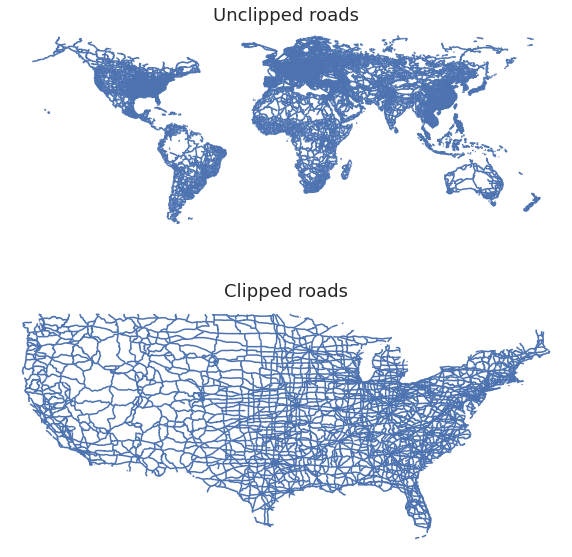

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

ne_roads.plot(ax=ax1)
ne_roads_clip.plot(ax=ax2)

ax1.set_title("Unclipped roads")
ax2.set_title("Clipped roads")

ax1.set_axis_off()
ax2.set_axis_off()

plt.axis('equal')
plt.show()

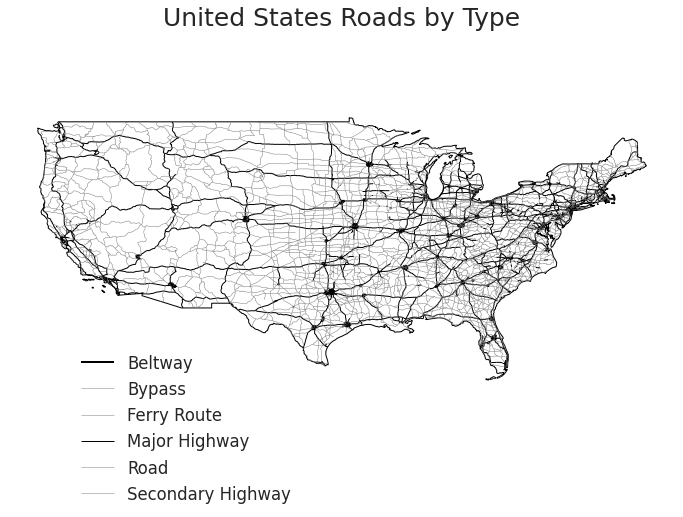

In [ ]:
# Plot with a custom legend

# First, create a dictionary with the attributes of each legend item
road_attrs = {'Beltway': ['black', 2],
              'Secondary Highway': ['grey', .5],
              'Road': ['grey', .5],
              'Bypass': ['grey', .5],
              'Ferry Route': ['grey', .5],
              'Major Highway': ['black', 1]}

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

for ctype, data in ne_roads_clip.groupby('type'):
    data.plot(color=road_attrs[ctype][0],
              label=ctype,
              ax=ax,
              linewidth=road_attrs[ctype][1])

country_boundary_us.plot(alpha=1, color="white", edgecolor="black", ax=ax)

ax.legend(frameon=False, 
          loc = (0.1, -0.1))

ax.set_title("United States Roads by Type", fontsize=25)
ax.set_axis_off()

plt.axis('equal')
plt.show()

## 5 Dissolve Polygons
Now, you will learn how to dissolve polygon data. Dissolving polygons entails combining polygons based upon a unique attribute value and removing the interior geometry.



You will dissolve the US states polygons by the region that each state is in. When you dissolve, you will create a new set polygons - one for each regions in the United States.

In [ ]:
# Check the geometry of the data
state_boundary_us.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117...."


In [ ]:
state_boundary_us.geom_type.head()

0    MultiPolygon
1         Polygon
2    MultiPolygon
3         Polygon
4         Polygon
dtype: object

Next, select the columns that you want to use for the dissolve and keep. In this case, you want to retain the following columns:
- LSAD
- geometry

In [ ]:
state_boundary = state_boundary_us[['LSAD', 'geometry']]
cont_usa = state_boundary.dissolve(by='LSAD')

# View the resulting geodataframe
cont_usa

,geometry
LSAD,
00,"MULTIPOLYGON Z (((-89.65699 30.11838 0.00000, ..."


Note that when you dissolve, the column used to perform the dissolve becomes an index for the resultant geodataframe. Thus you will have to use the reset_index() method when you plot to access the region 'column'.

In [ ]:
cont_usa.reset_index()

,LSAD,geometry
0,00,"MULTIPOLYGON Z (((-89.65699 30.11838 0.00000, ..."


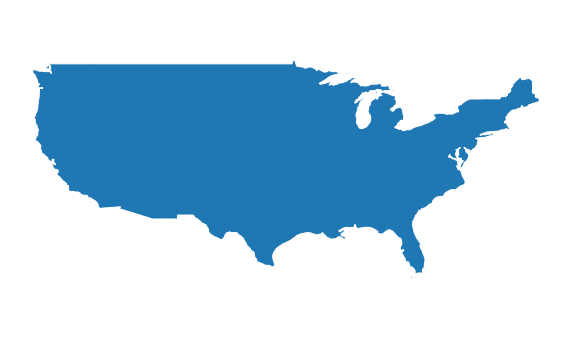

In [ ]:
# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
cont_usa.reset_index().plot(column='LSAD',
                            ax=ax)
ax.set_axis_off()
plt.axis('equal')
plt.show() 

Note the LSAD attribute values for every polygon in the data is 00. Thus when you dissolve by that atrribute, you get one resulting polygon. 

Next, you will learn how to aggreate quantitative values in your attribute table when you perform a dissolve. You can choose a suite of different summary functions including:
- first
- last
- mean
- max

In [ ]:
# Select the columns that you wish to retain in the data
state_boundary = state_boundary_us[['region', 'geometry', 'ALAND', 'AWATER']]

# Then summarize the quantative columns by 'sum'
regions_agg = state_boundary.dissolve(by='region', aggfunc='sum')
regions_agg

,geometry,ALAND,AWATER
region,,,
Midwest,"MULTIPOLYGON Z (((-89.12047 36.89190 0.00000, ...",1943869253244,184383393833
Northeast,"MULTIPOLYGON Z (((-76.04621 38.02553 0.00000, ...",869066138232,108922434345
Southeast,"MULTIPOLYGON Z (((-81.44310 30.60094 0.00000, ...",1364632039655,103876652998
Southwest,"POLYGON Z ((-94.41906 33.57722 0.00000, -94.38...",1462631530997,24217682268
West,"MULTIPOLYGON Z (((-118.35350 32.82196 0.00000,...",2432336444730,57568049509


In [ ]:
# Convert area units from square meters to hectares (divide by 10,000)
regions_agg["land_ha"] = regions_agg["ALAND"] / 10000
regions_agg["water_ha"] = regions_agg["AWATER"] / 10000
regions_agg

,geometry,ALAND,AWATER,land_ha,water_ha
region,,,,,
Midwest,"MULTIPOLYGON Z (((-89.12047 36.89190 0.00000, ...",1943869253244,184383393833,1.943869e+08,1.843834e+07
Northeast,"MULTIPOLYGON Z (((-76.04621 38.02553 0.00000, ...",869066138232,108922434345,8.690661e+07,1.089224e+07
Southeast,"MULTIPOLYGON Z (((-81.44310 30.60094 0.00000, ...",1364632039655,103876652998,1.364632e+08,1.038767e+07
Southwest,"POLYGON Z ((-94.41906 33.57722 0.00000, -94.38...",1462631530997,24217682268,1.462632e+08,2.421768e+06
West,"MULTIPOLYGON Z (((-118.35350 32.82196 0.00000,...",2432336444730,57568049509,2.432336e+08,5.756805e+06


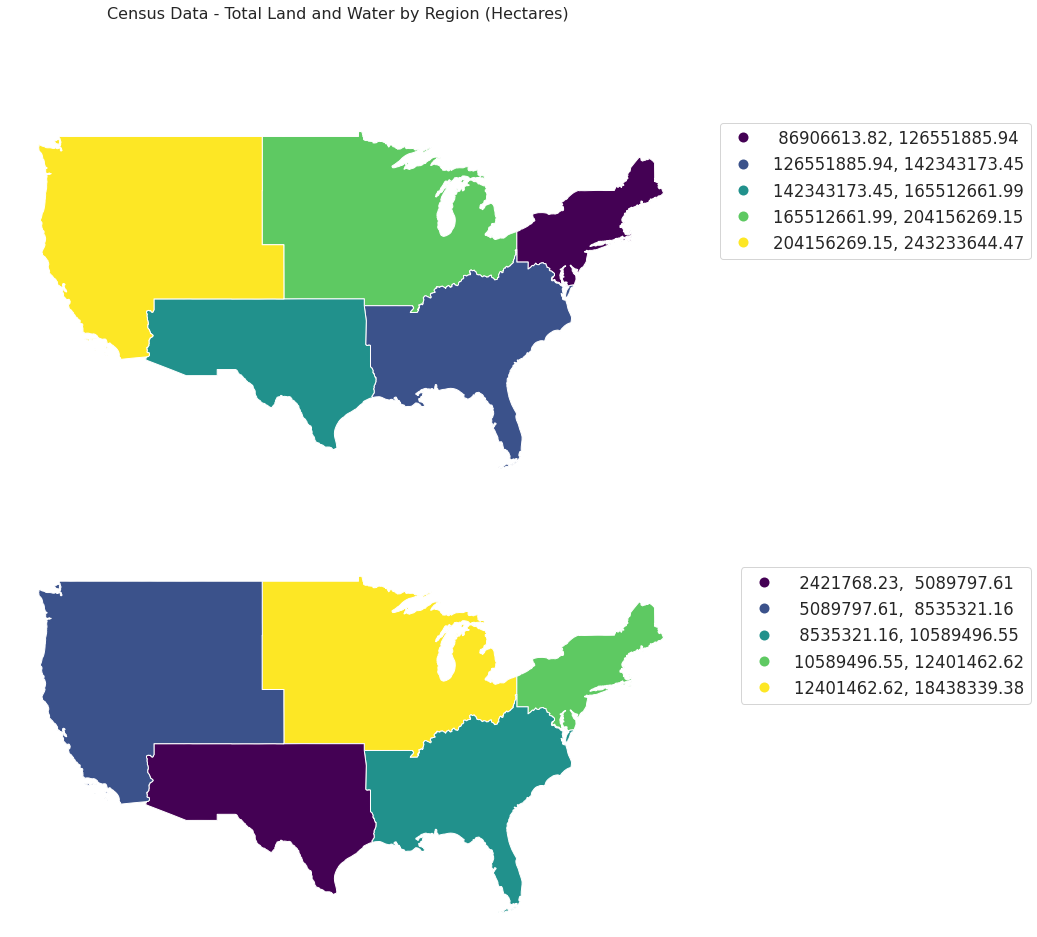

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15))

regions_agg.plot(column='land_ha',
                 legend=True,
                 scheme="quantiles",
                 ax=ax1)

regions_agg.plot(column='water_ha',
                 scheme="quantiles",
                 legend=True,
                 ax=ax2)

leg = ax1.get_legend()
leg.set_bbox_to_anchor((1.5,1))

leg = ax2.get_legend()
leg.set_bbox_to_anchor((1.5,1))
ax1.set_axis_off()
ax2.set_axis_off()
plt.suptitle('Census Data - Total Land and Water by Region (Hectares)', fontsize=16)

#plt.axis('equal')
plt.show()

## 6. Spatial Joins
Sometimes, we need to join attributes from one shapefile to another. A spatial join is when you append the attributes of one layer to another based upon its spatial relationship.

In this section, you will have a roads layer for the United States and you want to apply the "region" attribute to every road that is spatially in a particular region.




In [ ]:
# Import data
data_path = os.path.join("spatial-vector-lidar")

country_bound_us = gpd.read_file(os.path.join(data_path, "usa", 
                                              "usa-boundary-dissolved.shp"))
                                 
state_bound_us = gpd.read_file(os.path.join(data_path, "usa", 
                                            "usa-states-census-2014.shp"))
                               
pop_places = gpd.read_file(os.path.join(data_path, "global", 
                                        "ne_110m_populated_places_simple", 
                                        "ne_110m_populated_places_simple.shp"))
                                        
ne_roads = gpd.read_file(os.path.join(data_path, "global", 
                                      "ne_10m_roads", "ne_10m_roads.shp"))

Next clip the roads to the US boundary and dissolve states by region.

In [ ]:
# Simplify the country boundary just a little bit to make this run faster
country_bound_us_simp = country_bound_us.simplify(.2, preserve_topology=True)

# Clip the roads to the US boundary - this will take about a minute to execute
roads_cl = gpd.clip(ne_roads, country_bound_us_simp)
roads_cl.crs = ne_roads.crs

# Dissolve states by region
regions_agg = state_bound_us.dissolve(by="region")

In [ ]:
roads_cl.head()

In [ ]:
regions_agg.head()

,geometry,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER
region,,,,,,,,,,
Midwest,"MULTIPOLYGON Z (((-89.12047 36.89190 0.00000, ...",17,01779784,0400000US17,17,IL,Illinois,00,143794747023,6200927458
Northeast,"MULTIPOLYGON Z (((-76.04621 38.02553 0.00000, ...",11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500
Southeast,"MULTIPOLYGON Z (((-81.44310 30.60094 0.00000, ...",12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551
Southwest,"POLYGON Z ((-94.41906 33.57722 0.00000, -94.38...",48,01779801,0400000US48,48,TX,Texas,00,676601887070,19059877230
West,"MULTIPOLYGON Z (((-118.35350 32.82196 0.00000,...",06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881


In [ ]:
# Roads within region
roads_region = gpd.sjoin(roads_cl, 
                         regions_agg, 
                         how="inner", 
                         op='intersects')

# Notice once you have joins the data - you have attributes 
# from the regions_object (i.e. the region) attached to each road feature
roads_region[["featurecla", "index_right", "ALAND"]].head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


,featurecla,index_right,ALAND
1453,Road,West,403483823181
1434,Road,West,403483823181
1492,Road,West,403483823181
50512,Road,West,403483823181
49677,Road,West,403483823181


In [ ]:
roads_region

,scalerank,featurecla,type,sov_a3,note,edited,name,namealt,namealtt,routeraw,...,index_right,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER
1453,3,Road,Major Highway,USA,None,New in version 2.0.0,5,None,None,None,...,West,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881
1434,4,Road,Secondary Highway,USA,None,New in version 2.0.0,199,None,None,None,...,West,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881
1492,6,Road,Secondary Highway,USA,None,New in version 2.0.0,395,None,None,None,...,West,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881
50512,7,Road,Secondary Highway,USA,None,New in version 2.0.0,191,None,None,None,...,West,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881
49677,7,Road,Secondary Highway,USA,None,New in version 2.0.0,91,None,None,None,...,West,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2696,7,Road,Secondary Highway,USA,None,New in version 2.0.0,59,None,None,None,...,Southwest,48,01779801,0400000US48,48,TX,Texas,00,676601887070,19059877230
2706,6,Road,Secondary Highway,USA,None,New in version 2.0.0,77,None,None,None,...,Southwest,48,01779801,0400000US48,48,TX,Texas,00,676601887070,19059877230
51665,7,Road,Secondary Highway,USA,None,New in version 2.0.0,77A,None,None,None,...,Southwest,48,01779801,0400000US48,48,TX,Texas,00,676601887070,19059877230
51896,7,Road,Major Highway,USA,None,New in version 2.0.0,181,None,None,None,...,Southwest,48,01779801,0400000US48,48,TX,Texas,00,676601887070,19059877230


In [ ]:
# Reproject to Albers for plotting
country_albers = country_bound_us.to_crs({'init': 'epsg:5070'})
roads_albers = roads_region.to_crs({'init': 'epsg:5070'})

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


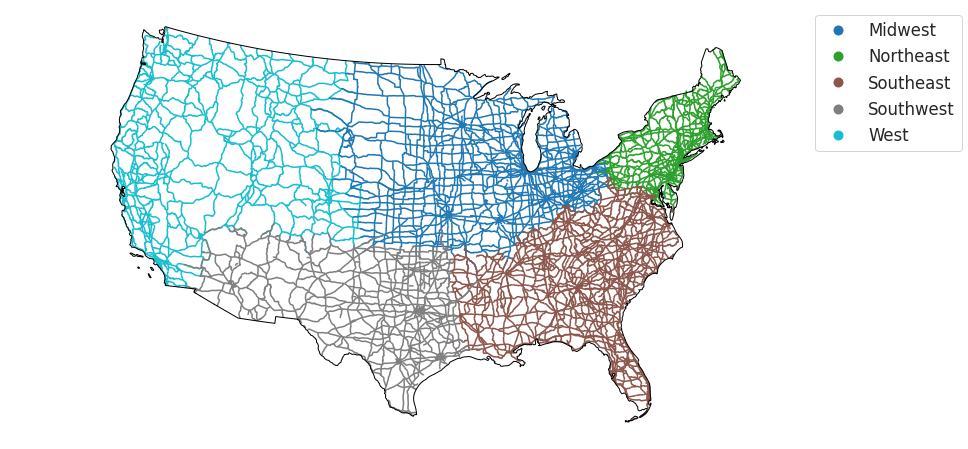

In [ ]:
# Plot the data
fig, ax = plt.subplots(figsize=(15, 8))

country_albers.plot(alpha=1,
                    facecolor="none",
                    edgecolor="black",
                    zorder=10,
                    ax=ax)

roads_albers.plot(column='index_right',
                  ax=ax,
                  legend=True)

# Adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.15,1))

ax.set_axis_off()
plt.axis('equal')
plt.show()

Plot of roads colored by region with a standard geopandas legend.

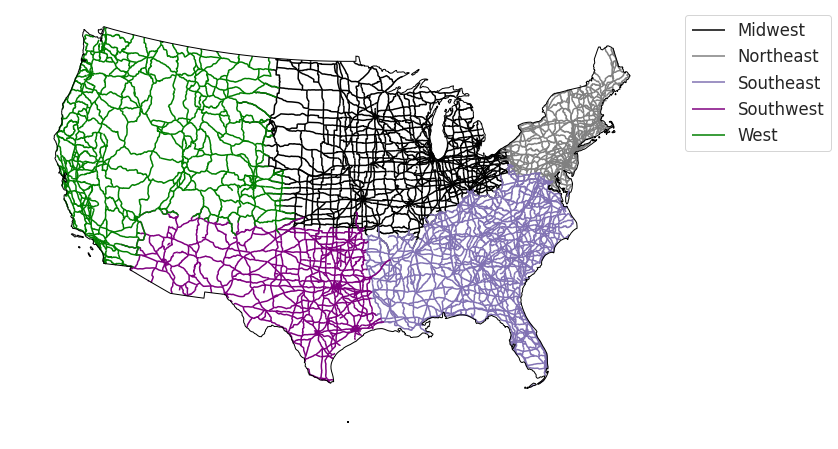

In [ ]:
# First, create a dictionary with the attributes of each legend item
road_attrs = {'Midwest': ['black'],
              'Northeast': ['grey'],
              'Southeast': ['m'],
              'Southwest': ['purple'],
              'West': ['green']}

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

regions_agg.plot(edgecolor="black",
                 ax=ax)
country_albers.plot(alpha=1,
                    facecolor="none",
                    edgecolor="black",
                    zorder=10,
                    ax=ax)

for ctype, data in roads_albers.groupby('index_right'):
    data.plot(color=road_attrs[ctype][0],
              label=ctype,
              ax=ax)
    
# This approach works to place the legend when you have defined labels
plt.legend(bbox_to_anchor=(1.0, 1), loc=2)
ax.set_axis_off()
plt.axis('equal')
plt.show()

You can also calculate line segment length.

In [ ]:
# Turn off scientific notation
pd.options.display.float_format = '{:.4f}'.format

# Calculate the total length of road 
road_albers_length = roads_albers[['index_right', 'length_km']]

# Sum existing columns
roads_albers.groupby('index_right').sum()

roads_albers['rdlength'] = roads_albers.length
sub = roads_albers[['rdlength', 'index_right']].groupby('index_right').sum()
sub

,rdlength
index_right,
Midwest,86575020.6373
Northeast,33786036.8608
Southeast,84343077.8904
Southwest,49373104.8209
West,61379830.5534


Reference: https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/subset-time-series-data-python/